> # Chapter 15. Prediction
---




### 1.  Correlation 


### 2.  The Regression Line 


### 3.  The Method of Least Squares 


### 4.  Least Squares Regression 


### 5.   Visual Diagnostics 


### 6.   Numerical Diagnostics 




In [ ]:
# HIDDEN
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(threshold=50)

fpath='https://raw.githubusercontent.com/data-8/textbook/878363106db4313de925a709b1617d6f328c56a1/assets/data/'

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  


+ Data science에서 중요한 task 중 하나는 ___prediction___ 이다.
 - 즉, 미래(시간적) 혹은 알거나 보지 못한 상황에 대한 결과를 예측하는 것이다.
 - 앞서 평균부모키로부터 자식의 키를 예측해 보았다.
 - 이 장에서는  prediction에 관한 보다 자세한 개념과 방법을 배워보자.

> ###  Correlation
---
+ Scattor diagram이 얼마나 직선에 밀접해 있는지를 나타내는 척도
+ Linear assocation 
+ 하이브리드 차 정보에 관한 다음 데이터를 이용해 공부해 보자.

In [ ]:
hybrid = Table.read_table(fpath+'hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


+ vehicle: 자동차 모델명 
+ year: 제조년도 
+ msrp: 제조사 제시 소매가 (2013년 달러)
+ acceleration: 가속 비율 (km per hour per second)
+ mpg: 연료효율 (miles per gallon)
+ class: 자동차 분류


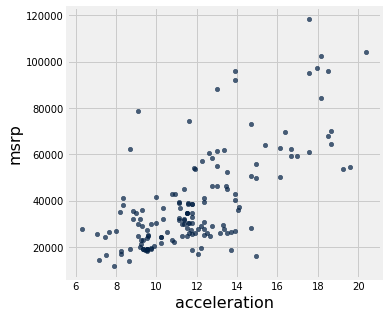

In [ ]:
hybrid.scatter('acceleration', 'msrp')

+ 성능(acceleration)이 좋을수록 가격(msrp)이 비싸다.
 - 즉, 양의 상관관계가 있다.
 

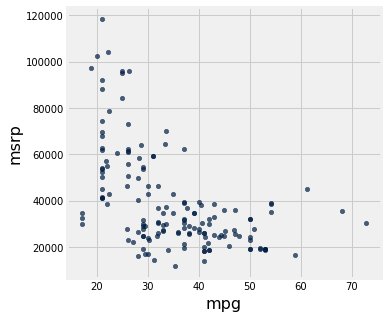

In [ ]:
hybrid.scatter('mpg', 'msrp')

+ 연료효율성(mpg)이 나쁠수록 가격이 높다.
 - 즉, 음의 상관관계가 있다.
 - 좋은 성능일수록 연료효율성이 나빠진다.
 - 그런데 다소 상관성이 직선이 아니라 곡선으로 보인다.

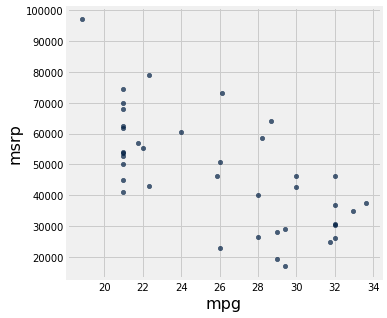

In [ ]:
suv = hybrid.where('class', 'SUV')
suv.scatter('mpg', 'msrp')

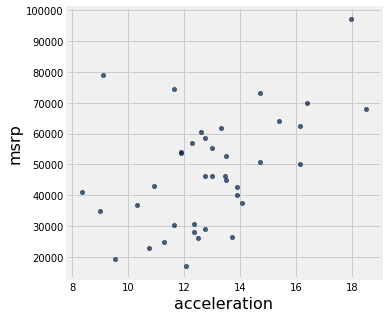

In [ ]:
suv.scatter('acceleration', 'msrp')

+ SUV 차량에 대한 상관성 결과는 보다 직선에 가까워 보인다.
+ 상관성을 정량화시킬 필요가 있다.
+ 데이터 사이의 차이를 일반화시킬 수 있도록 지난 시간에 배운 standard unit으로 바꿔서 진행해 보자.

In [ ]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  


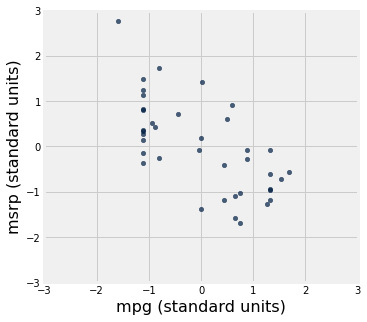

In [ ]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

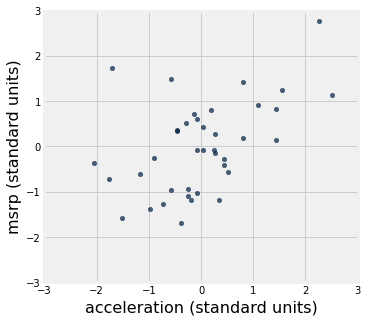

In [ ]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

이제 correlation을 도입해 보자.

> The correlation coefficient ($r$; 상관계수)
---
+ the strength of the linear relationship between two variables
+ 흔히 correlation으로 줄여쓰며 $r$로 표기한다.
 - The correlation coefficient $r$ is a number between -1 and 1.
 - $r$ measures the extent to which the scatter plot clusters around a straight line.
 - $r = 1$ if the scatter diagram is a perfect straight line sloping upwards, and $r = -1$ if the scatter diagram is a perfect straight line sloping downwards.

+ r_scatter() 함수는 예제 scatter를 보여준다.

In [ ]:
def r_scatter(r, n=1000):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, n)
    z = np.random.normal(0, 1, n)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

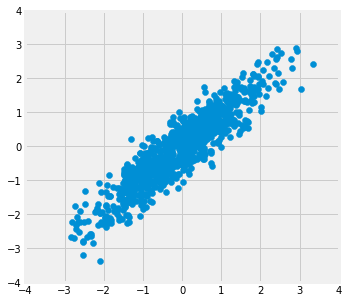

In [ ]:
r_scatter(0.9)


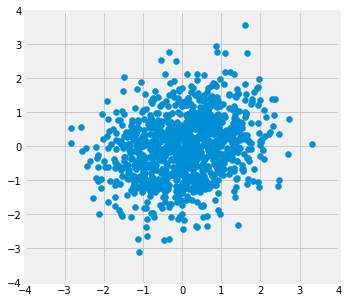

In [ ]:
r_scatter(0.25)

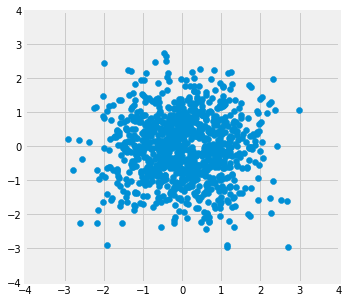

In [ ]:
r_scatter(0)

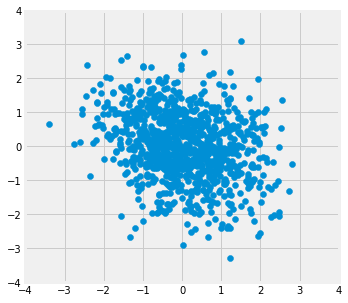

In [ ]:
r_scatter(-0.25)

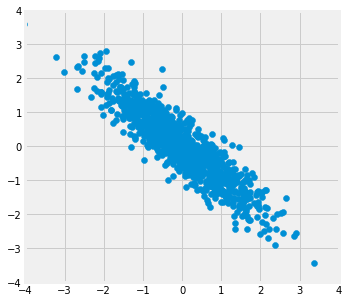

In [ ]:
r_scatter(-0.9)

Formula for $r$:

$r=\frac{Cov(X,Y)}{\sigma_{X} \sigma_{Y}}$

where $Cov(X,Y)=E(XY)-E(X)\cdot E(Y)$.

+ 두 변수 모두 standard units으로 측정된다면 $r=E(XY)$이다.

+ 다음 예제를 통해 살펴보자.


In [ ]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


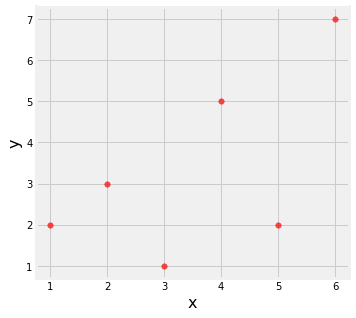

In [ ]:
t.scatter(0, 1, s=30, color='red')

__Step 1.__ Convert each variable to standard units.

In [ ]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


__Step 2.__ Multiply each pair of standard units.

In [ ]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


__Step 3.__ $r$ is the average of the products computed in Step 2.

In [ ]:
r = np.mean(t_product.column(4))
r

0.6174163971897709

> Properties of $r$
---
+ $r$ 은 두 축의 방향을 바꾸어도 변하지 않는다. (즉, $X$와 $Y$를 바꾸어도 변하지 않는다.)

Correlation 정의에 따라 다음과 같은 함수를 정의할 수 있다.

In [ ]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

In [ ]:
correlation(t, 'x', 'y')


0.6174163971897709

In [ ]:
correlation(t, 'y', 'x')

0.6174163971897709

In [ ]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [ ]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

+ Correlation은 Linear Association을 의미한다. 

+ Correlation이 Causation을 뜻하지 않는다.


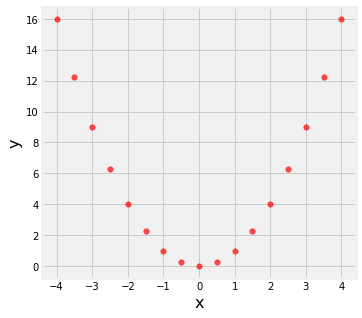

In [ ]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')


In [ ]:
correlation(nonlinear, 'x', 'y')

0.0

+ Correlation은 Outliers에 의해 영향을 크게 받을 수 있다.


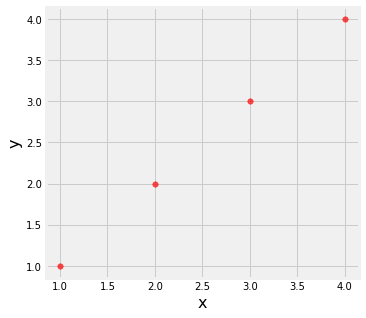

In [ ]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [ ]:
correlation(line, 'x', 'y')

1.0

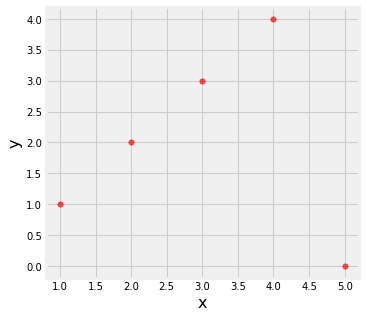

In [ ]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [ ]:
correlation(outlier, 'x', 'y')

0.0

> Ecological Correlations Should be Interpreted with Care.

In [ ]:
sat2014 = Table.read_table(fpath+'sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


+ Participation Rate : SAT 시험에 참가한 학생 수 비율
+ Critical Reading, Math, Writing : 3개 과목 평균점수

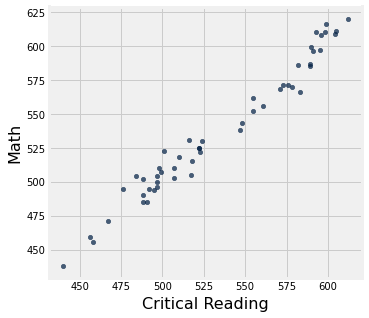

In [ ]:
sat2014.scatter('Critical Reading', 'Math')

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434

+ 상관계수가 매우 높지만 state's average 값에 대한 상관성을 말한다.
+ 개별학생들 전체에 관한 상관계수를 조사하면 더 낮을 것이다. 

<img src="https://raw.githubusercontent.com/cscUOU/course-datascience/main/image/chocoNobel.png" width="500">

> ### The Regression Line
---
+ $r$은 scattor plot의 점들이 어떤 직선에 얼마나 군집되었는지를 표현
+ 이 때 어떤 직선은 어떻게 구하는가? (단 $r<1$이라고 가정)

+ 아래 $r=0.5$인 예를 보자.
+ 그리고 slope(기울기)가 1인 붉은색 직선(즉 45도)을 같이 그려보자.

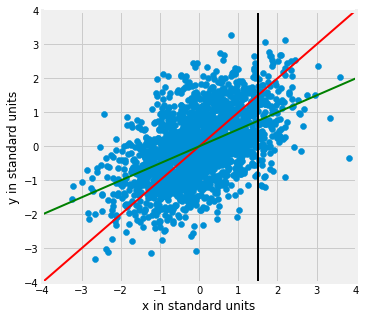

In [ ]:
r_scatter(0.5, 2000)
plots.plot([-4,4],[-4,4], color='r', lw=2)
plots.plot([-4,4],[-4*0.5,4*0.5], color='g', lw=2)
plots.xlabel('x in standard units')
plots.ylabel('y in standard units');
plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
# 초록색 선(Regression Line) : X축의 중간점을 연결한 선. 기울기 : r

+ 45도 기울기는 검은 선을 고려할 때 중앙에 위치해 보이지 않는다.
+ 기울기는 $r$로 표현된다. (아래 그림)
+ Zx = (X-X의 평균)/시그마 X
+ Zy = r*Zx
+ Y-My=r*(시그마y/시그마x)(X-Mx)
+ 기울기(a)= r*괄호내용
+ 절편 = My - a*Mx
+ 시그마 x = x의 표준편차임

<img src="https://raw.githubusercontent.com/cscUOU/course-datascience/main/image/regline.png" width="500">


+ 위 관계로부터 다음과 같이 regression 직선의 slope(기울기)와 intercept(절편)를 구할 수 있다.
 - slope = $r \frac{\sigma_y}{\sigma_x}$
 - intercept = $\mu_y - slope \cdot \mu_x$

In [ ]:
# r은 -1~1 이고, 기울기만으로 상관관계를 판단하면 안됨. 기울기에는 r 뿐만아니라 x와 y 표준편차의 비율도 영향을 주기 때문
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y): # y 절편
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

+ Galton의 데이터에 이용해 보자.

In [ ]:
galton = Table.read_table(fpath+'galton.csv')
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [ ]:
galton_r = correlation(heights, 'MidParent', 'Child')
galton_r # 이 결과가 정말 신뢰가능한가 라는 의심 -> sample 선정 운이 좋았던 것일 수 있음.
# 그래서 신뢰 구간 등을 추정하는 것

0.32094989606395924

In [ ]:
galton_slope = slope(heights, 'MidParent', 'Child') # correlation보다 커짐. y 표준편차가 x 표준편차보다 더 크기 떄문에 이런 겨로가
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [ ]:
heights_with_predictions = heights.with_column(
    'Regression Prediction', galton_slope*heights.column('MidParent') + galton_intercept
)
heights_with_predictions

MidParent,Child,Regression Prediction
75.43,73.2,70.7124
75.43,69.2,70.7124
75.43,69,70.7124
75.43,69,70.7124
73.66,73.5,69.5842
73.66,72.5,69.5842
73.66,65.5,69.5842
73.66,65.5,69.5842
72.06,71,68.5645
72.06,68,68.5645


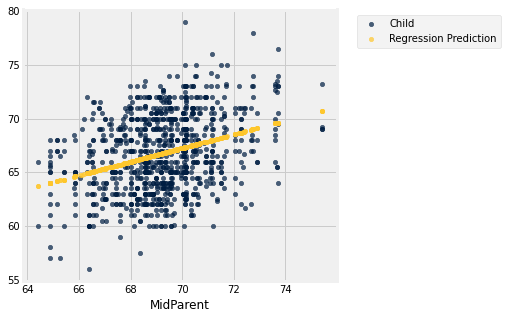

In [ ]:
heights_with_predictions.scatter('MidParent')

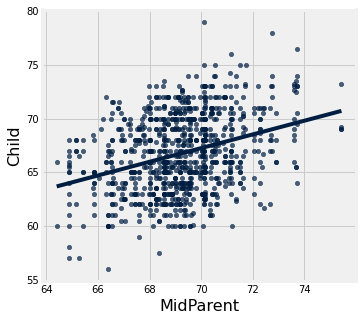

In [ ]:
heights.scatter('MidParent', fit_line=True)

+ regression line을 통해 prediction을 수행할 수 있다.
+ 부모평균키가 1인치 커지면 자녀키는 0.637인치 증가한다.

> ### The Method of Least Squares
---
+ 보다 일반적인 설명법을 이해해 보자.
+ $x$가 주어졌을 때 예측값 $\hat{y}$와 실제값 $y$ 사이에 오차가 존재한다.
 - $error = y - \hat{y}$
+ 예측이 정확하다면 오차는 0에 가까워질 것이다.
+ MSE = E*(error^2)
+ RMSE = sqrt(MSE)

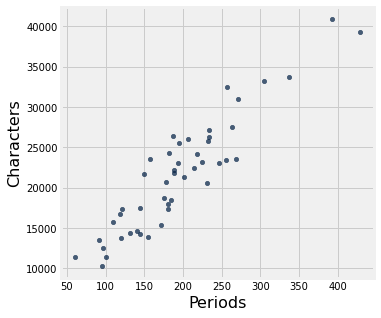

In [ ]:
little_women = Table.read_table(fpath+'little_women.csv')
little_women = little_women.move_to_start('Periods')
little_women.scatter('Periods', 'Characters')

In [ ]:
correlation(little_women, 'Periods', 'Characters')

0.9229576895854816

+ 선형 관계가 매우 강하다.

In [ ]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b


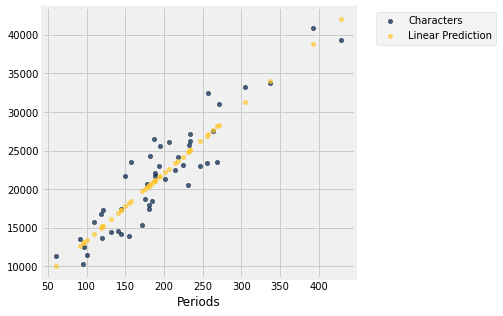

In [ ]:
lw_with_predictions = little_women.with_column('Linear Prediction', fit(little_women, 'Periods', 'Characters'))
lw_with_predictions.scatter('Periods')

In [ ]:
lw_with_predictions

Periods,Characters,Linear Prediction
189,21759,21183.6
188,22148,21096.6
231,20558,24836.7
195,25526,21705.5
255,23395,26924.1
140,14622,16921.7
131,14431,16138.9
214,22476,23358
337,33767,34056.3
185,18508,20835.7


In [ ]:
actual = lw_with_predictions.column('Characters')
predicted = lw_with_predictions.column('Linear Prediction')
errors = actual - predicted

In [ ]:
lw_with_predictions.with_column('Error', errors)

Periods,Characters,Linear Prediction,Error
189,21759,21183.6,575.403
188,22148,21096.6,1051.38
231,20558,24836.7,-4278.67
195,25526,21705.5,3820.54
255,23395,26924.1,-3529.13
140,14622,16921.7,-2299.68
131,14431,16138.9,-1707.88
214,22476,23358,-882.043
337,33767,34056.3,-289.317
185,18508,20835.7,-2327.69


+ 다음 그래프를 통해 오차의 의미를 더 잘 이해해보자.

In [ ]:
lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')

In [ ]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope of Regression Line:     87.0 characters per period
Intercept of Regression Line: 4745.0 characters


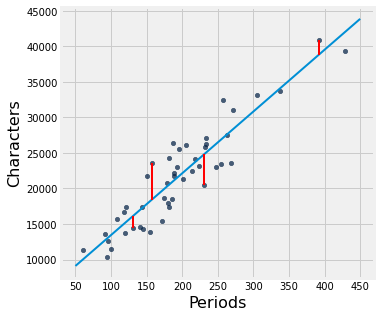

In [ ]:
print('Slope of Regression Line:    ', np.round(lw_reg_slope), 'characters per period')
print('Intercept of Regression Line:', np.round(lw_reg_intercept), 'characters')
lw_errors(lw_reg_slope, lw_reg_intercept)


+ 다른 직선의 경우를 그려보자.
 - 오차가 더욱 커진다.

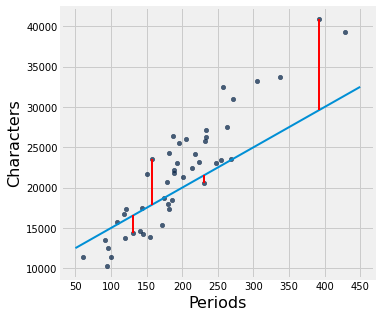

In [ ]:
lw_errors(50, 10000)

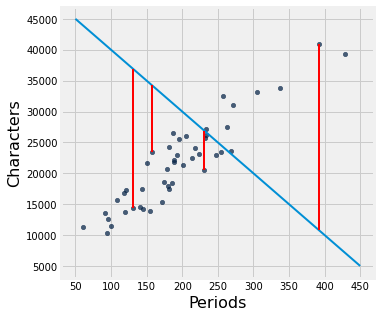

In [ ]:
lw_errors(-100, 50000)

표준편차 정의의 개념과 비슷한 방식으로 

좋은 직선인지는 RMSE (Root Mean Squared Error)로 평가할 수 있다.

In [ ]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Root mean squared error: 4322.167831766537


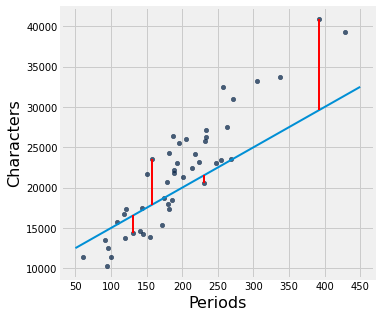

In [ ]:
lw_rmse(50, 10000)

Root mean squared error: 16710.11983735375


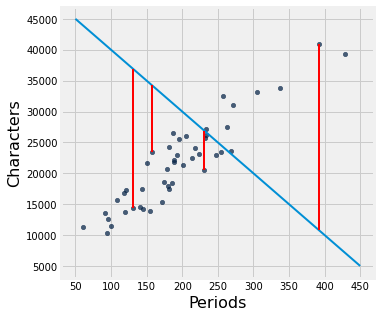

In [ ]:
lw_rmse(-100, 50000)

Root mean squared error: 2715.5391063834586


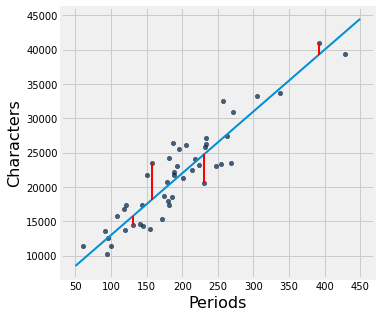

In [ ]:
lw_rmse(90, 4000)

Root mean squared error: 2701.690785311856


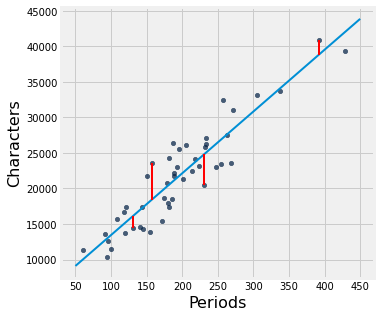

In [ ]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

+ RMSE를 최소화하는 직선이 regression line이다.


The regression line is the unique straight line that minimizes the mean squared error of estimation among all straight lines.

> ### Least Squares Regression
---
+ 다른 scattor plot에서 상관성을 고려해 보자.

In [ ]:
shotput = Table.read_table(fpath+'shotput.csv')
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


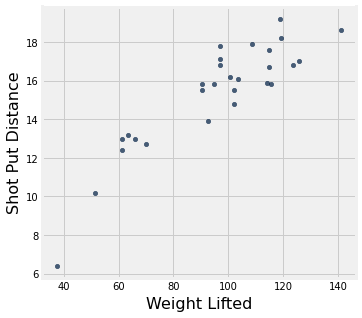

In [ ]:
shotput.scatter('Weight Lifted')


+ 비록 럭비공모양은 아니지만 regression line이 존재한다.

In [ ]:
slope(shotput, 'Weight Lifted', 'Shot Put Distance')

0.09834382159781997

In [ ]:
intercept(shotput, 'Weight Lifted', 'Shot Put Distance')

5.959629098373952

+ minimize함수를 이용하여 regression line이 최소제곱합 오류인지를 확인해 보자.

In [ ]:
def shotput_linear_mse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [ ]:
minimize(shotput_linear_mse)

array([0.09834382, 5.95962911])

+ regression line이 최소제곱합(MSE) 오류를 가지는 직선이다.


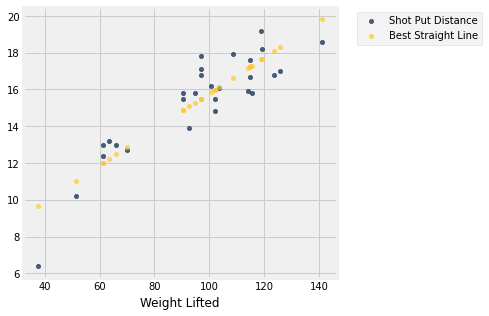

In [ ]:
fitted = fit(shotput, 'Weight Lifted', 'Shot Put Distance')
shotput.with_column('Best Straight Line', fitted).scatter('Weight Lifted')


+ 만약 직선이 아니라면 어떨까?
+ 2차 함수(quadratic funtion)에 대해서 생각해 보자.
 - 다음 정의에서 'fitted' 계산에 주목

In [ ]:
def shotput_quadratic_mse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    fitted = a*(x**2) + b*x + c
    return np.mean((y - fitted) ** 2)


In [ ]:
best = minimize(shotput_quadratic_mse)
best

array([-1.04004838e-03,  2.82708045e-01, -1.53182115e+00])

+ 만약 x=100 이라면 예측값은?

In [ ]:
(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

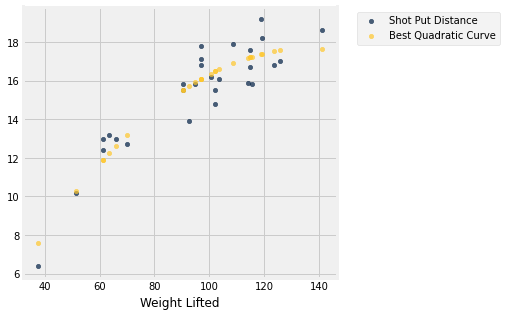

In [ ]:
x = shotput.column(0)
shotput_fit = best.item(0)*(x**2) + best.item(1)*x + best.item(2)
shotput.with_column('Best Quadratic Curve', shotput_fit).scatter(0)

> ### Visual Diagnostics
---
+ Regression line이 적합한지 생각해 보아야 한다.
+ Residual (즉, 잔차)를 고려해 보자. 의미상으로는 Error와 동일. 하지만 대상이 조금 다름.

In [ ]:
def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

In [ ]:
heights = heights.with_columns(
        'Fitted Value', fit(heights, 'MidParent', 'Child'),
        'Residual', residual(heights, 'MidParent', 'Child')
    )
heights

MidParent,Child,Fitted Value,Residual
75.43,73.2,70.7124,2.48763
75.43,69.2,70.7124,-1.51237
75.43,69,70.7124,-1.71237
75.43,69,70.7124,-1.71237
73.66,73.5,69.5842,3.91576
73.66,72.5,69.5842,2.91576
73.66,65.5,69.5842,-4.08424
73.66,65.5,69.5842,-4.08424
72.06,71,68.5645,2.43553
72.06,68,68.5645,-0.564467


In [ ]:
def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

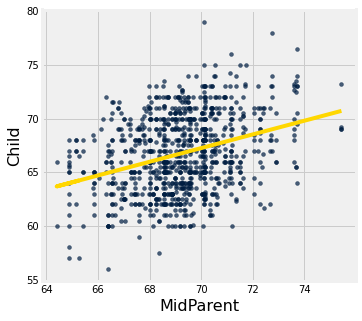

In [ ]:
scatter_fit(heights, 'MidParent', 'Child')

+ $x$와 $residual$ 사이의 분포 상관성을 그려보자.

In [ ]:
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')


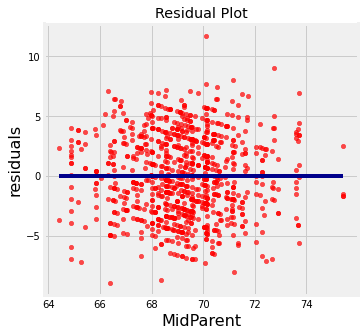

In [ ]:
residual_plot(heights, 'MidParent', 'Child')

+ 증가나 감소의 경향이 보이지 않는다.
+ 이와 같은 분석을 _regression diagnostics_ 라 한다.
+ 좋은 residual은 어떤 패턴을 보이지 않아야 한다.
 - $y=0$ 선을 기준으로 위 아래가 비슷해야 한다. 
+ 그렇지 않은 사례를 살펴보자. 
 - 호주의 듀공(바다포유류의 일종)에 관한 데이터

In [ ]:
dugong = Table.read_table('http://www.statsci.org/data/oz/dugongs.txt')
dugong = dugong.move_to_start('Length')
dugong

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5
2.27,4
2.15,5
2.26,5
2.35,7
2.47,8


In [ ]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

+ 매우 높은 상관계수값을 보인다.
+ 선형관계임이 당연한가?

In [ ]:
def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)

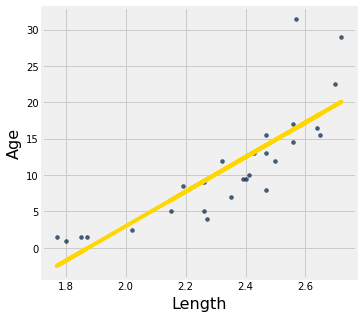

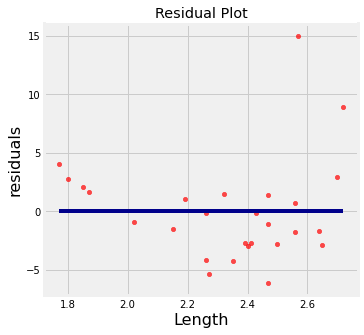

In [ ]:
regression_diagnostic_plots(dugong, 'Length', 'Age')

+ nonlinearity (비선형) 관계가 의심된다.
+ 또 다른 사례를 살펴보자.

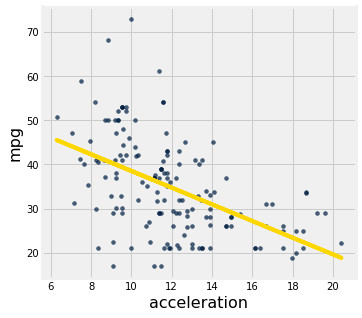

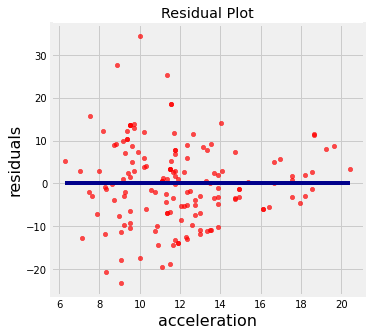

In [ ]:
regression_diagnostic_plots(hybrid, 'acceleration', 'mpg')

+ accel. 이 작을 때 residual의 분산이 크고
+ accel. 이 클 때 residual의 분산이 작다.
+ 이를 Heteroscedasticity(이분산성)이라 하며 regression 정확성이 편차가 있음을 의미한다.

> ### Numerical Diagnostics
----
+ 앞서 residual diagnostics은 regression이 linear인지 여부와는 상관이 없다.
+ Residual 성질


For every linear regression, whether good or bad, the residual plot shows no trend. 
+ Overall, it is flat. In other words, the residuals and the predictor variable are uncorrelated.

In [ ]:
correlation(heights, 'MidParent', 'Residual')

-2.719689807647064e-16

Average of Residuals


+ No matter what the shape of the scatter diagram, the average of the residuals is 0.

In [ ]:
np.mean(heights.column('Residual'))

5.256799040794746e-15

SD of the Residuals (증명 생략)

+ No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the response variable. The fraction is $\sqrt{1-r^2}$.

$$ \textrm{SD of residuals} = \sqrt{1-r^2} \cdot \textrm{SD of }y$$

+ 비슷한 방식으로

$$ \textrm{SD of fitted value} (\hat{y}) = |r| \cdot \textrm{SD of }y$$


In [ ]:
np.std(heights.column('Residual'))

3.3880799163953426

In [ ]:
r = correlation(heights, 'MidParent', 'Child')
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

3.388079916395342

A relevant equation
 
+ $\frac{Var(\hat{y})}{Var(y)} = r^2 $

> ### Recap
---

+ Correlation
 - $r=E(XY)$ (단, $X, Y$는 standard units)
+ Regression Line
 - standard units : 기울기가 $r$이고 원점을 지나는 직선
 - original units
   - slope = $r \frac{\sigma_y}{\sigma_x}$
   - intercept = $\mu_y - slope \cdot \mu_x$
 - scatter()의 fit_line=True 설정으로 그릴 수 있다.
+ Least Squares Method (최소제곱법)
 - RMSE 최소화하는 직선
 - regression line = mean sqaures line
+ Least Squares Regression
 - error함수를 정의하고 minimize함수를 통해 최적화
+ Visual diagnostics
 - Residual의 분포가 nonlinearity, Heteroscedasticity 와 같은 아무런 패턴이 없어야 한다.